## Controle magnétique d'Interfaces Liquides

### Résolution sans champ magnétique

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Initialisation des constantes

In [2]:
g = 9.81      

#delta = rho2 - rho1    avec rho2 eau et rho1 huile       
delta = 80.0 #eau/ huile

#gamma = tension de surface
gamma = 0.018 #eau/huile

#lc = longueur capilaire
lc = np.sqrt(gamma/(delta*g))

#d = longueur de la cuve
d = 10*lc

eps = -0.1 #arbitraire et petit

print("La taille de la cuve est de",d,"m")
lc


La taille de la cuve est de 0.04789131426105757 m


0.004789131426105757

Solution exacte de l'équation :
$$\eta(x) = -\exp(\frac{-x}{l_{c}})l_{c}tan(\epsilon)\frac{(1 + \exp{\frac{d}{l_{c}}})}{\exp{\frac{d}{l_{c}}-\exp(\frac{-d}{l_{c}})}} -\exp(\frac{x}{l_{c}})l_{c}tan(\epsilon)\frac{(1 + \exp{\frac{-d}{l_{c}}})}{\exp{\frac{d}{l_{c}}}-\exp(\frac{-d}{l_{c}})}$$

In [3]:
def eta(x):
    return -np.exp(-x/lc)*(lc*np.tan(eps)*(1+np.exp(d/lc)))/(np.exp(d/lc)-np.exp(-d/lc)) - np.exp(x/lc)*lc*np.tan(eps)*(1+np.exp(-d/lc))/(np.exp(d/lc)-np.exp(-d/lc))

print("Hauteur aux parois de la cuve",eta(0),"et",eta(d),"m")



Hauteur aux parois de la cuve 0.0004805595639724251 et 0.0004805595639724251 m


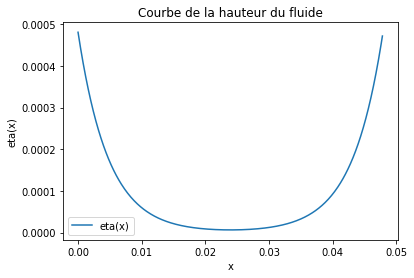

In [4]:
x = np.arange(0,d,0.0001)

plt.plot(x,eta(x),label = 'eta(x)')
plt.title('Courbe de la hauteur du fluide')
plt.xlabel("x")
plt.ylabel("eta(x)")
plt.legend()
plt.show()

------

-----

Conditions limites

In [5]:
eta0p = np.tan(eps) #connu
etadp = -np.tan(eps) #connu, à comparer avec valeur trouvée

### EULER EXPLICITE

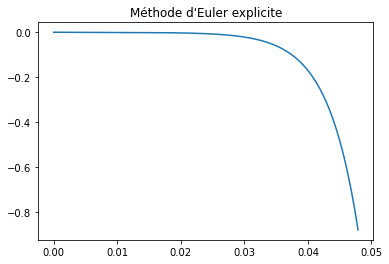

comparaison pente aux paroi: -184.04998849901435 =? 0.10033467208545055
pourcentage d'erreur 183536.0791474628


In [6]:
#h = le pas
h = lc/1000

x_euler = np.arange(0,d,h)

eta0 = 0.0004  #premier point
eta1 = eta0 + (x_euler[1] - x_euler[0])*eta0p #deuxieme point (trouvé grace au premier point et la pente)

def eulerexplicite(f,x,u0):
    eta = np.zeros((x.size,u0.size))
    h = x[1] - x[0]
    eta[0] = u0

    for i in range(1,x.size):
        eta[i] = eta[i-1] + h*f(x[i-1],eta[i-1])

    return eta

def f(t,u):
    return np.array([u[1], u[0]*g*delta/gamma])


u0 = np.array([eta0,eta0p]) 
eta_euler = eulerexplicite(f,x_euler,u0)



plt.plot(x_euler,eta_euler[:,0])
plt.title("Méthode d'Euler explicite")
plt.show()

print("comparaison pente aux paroi:",eta_euler[-1,1],"=?",etadp)
print("pourcentage d'erreur",abs((etadp - eta_euler[-1,1] )/etadp *100))



On fait une étude de convergence afin que la méthode choisie ne soit plus dépendente du pas. Ainsi, on compare etadp trouvé avec etadp (condition lim) et si l'erreur entre les deux est inf 5% alors le pas est dans l'intervalle de convergence

In [7]:

#pas initial
h_c = lc/1000


x_euler_c = np.arange(0,d,h_c)
eta0 = 0.0004
eta1 = eta0 + (x_euler_c[1] - x_euler_c[0])*eta0p 

u0 = np.array([eta0,eta0p]) 
eta_euler = eulerexplicite(f,x_euler_c,u0)

while(abs((eta_euler[-1,1] - etadp)/etadp *100)>5):
    h_c = h_c + 0.00001 #precision

    x_euler_c = np.arange(0,d,h_c)
    eta0 = eta(0)
    eta1 = eta0 + (x_euler_c[1] - x_euler_c[0])*eta0p 

    u0 = np.array([eta0,eta0p]) 
    eta_euler = eulerexplicite(f,x_euler_c,u0)




print(eta_euler[-1,1],"=?",etadp)
p_erreur = abs((etadp - eta_euler[-1,1] )/etadp *100) #pourcentage erreur

print("pas trouvé pour",p_erreur,"'%' d'erreur :",h_c)

0.0987159434245712 =? 0.10033467208545055
pas trouvé pour 1.6133292980723075 '%' d'erreur : 1.4789131426105757e-05


On trouve ainsi que le pas h vaut

### Méthode de dichotomie pour retrouver eta0

In [8]:

a = 0.0004806  #precision necessaire : 6 à 7 chiffres après la virgule
ua = np.array([a,eta0p])
b = 0.0004804
ub = np.array([b,eta0p])

#premieres courbes de la methode de dichotomie
euler_a = eulerexplicite(f,x_euler,ua) 
euler_b = eulerexplicite(f,x_euler,ub)

nb = 0

c = (a+b)/2
uc = np.array([c,eta0p])
euler_c = eulerexplicite(f,x_euler,uc)

while(np.abs(euler_c[-1,1] - etadp)> 1e-4 and nb<10000):

    if (euler_c[-1,1] < etadp):
        b = c

    if (euler_c[-1,1] > etadp):
        a = c
    
    c = (a+b)/2
    uc = np.array([c,eta0p])
    euler_c = eulerexplicite(f,x_euler,uc)
    
    nb = nb + 1

print("Eta0 trouvé par dichotomie:",c,"?=",eta(0),"la valeur analytique")



Eta0 trouvé par dichotomie: 0.00048055986328125 ?= 0.0004805595639724251 la valeur analytique


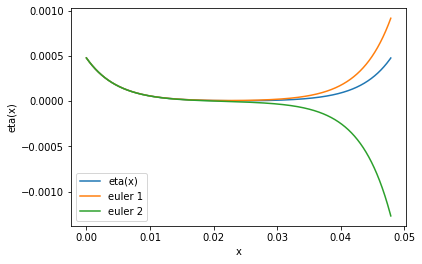

In [9]:
plt.plot(x_euler,eta(x_euler),label = 'eta(x)')
plt.plot(x_euler,euler_a[:,0],label="euler 1")
plt.plot(x_euler,euler_b[:,0],label="euler 2")
plt.xlabel("x")
plt.ylabel("eta(x)")
plt.legend()
plt.show()

### Erreur Euler explicite avec solution exacte

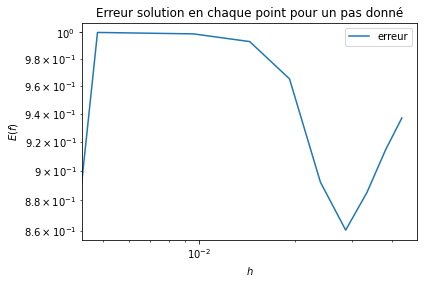

In [10]:
M = np.zeros(10)
x = np.arange(0,d,lc)
soln = eulerexplicite(f,x,u0)
E1 = np.zeros(x.size)

for i in range (x.size):
    
    E1[i] = np.abs((eta(x[i]) - soln[i,0])/eta(x[i]))
    

plt.loglog(x,E1,label='erreur')
plt.xlabel("$h$")
plt.ylabel("$E(f)$")
plt.title('Erreur solution en chaque point pour un pas donné')
plt.legend()
plt.show()


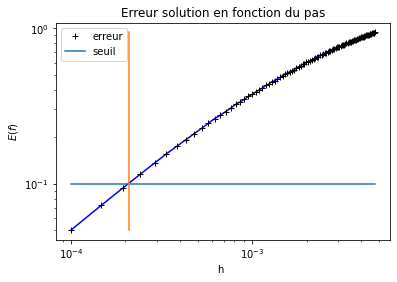

Le pas optimal est  0.00021 pour un seuil d'erreur à 0.1


In [19]:
h = np.linspace(1e-4,lc,100)
eta0 = eta(0)
M = np.zeros(h.size)
u0 = np.array([eta0,eta0p]) 


for i in range (h.size):
    x = np.arange(0,d,h[i])
    soln = eulerexplicite(f,x,u0)
    E = 0
    for j in range (x.size):
        
        E = E + np.abs((eta(x[j]) - soln[j,0])/eta(x[j])) 
    
   
    M[i] = E/j #erreur moyenne
    

seuil = np.ones(h.size)
for i in range (h.size):
    seuil[i] = 0.1

h_opti = np.ones(h.size)
for i in range (h.size):
    h_opti[i] = 0.00021

plt.loglog(h,M,color='blue')
plt.loglog(h,M,'+',label='erreur',color='black')
plt.loglog(h,seuil,label='seuil')
plt.loglog(h_opti,M)  
plt.xlabel("h ")
plt.ylabel("$E(f)$")
plt.title('Erreur solution en fonction du pas')
plt.legend()
plt.show()
    

print("Le pas optimal est ",h_opti[1],"pour un seuil d'erreur à 0.1")


Pour chaque pas on calcule la moyenne des erreurs de la méthode d'Euler

-----

----

### Piste de recherches non aboutie

Erreur Euler explicite sans solution exacte

In [12]:
h = np.linspace(1e-4,lc,100)
print(h.size)
Er = np.zeros(h.size-1)


for i in range (h.size):
    xn = np.arange(0,d,h[i])
    soln = eulerexplicite(f,xn,u0)
    xn1 = np.arange(0,d,h[i+1])
    soln1 = eulerexplicite(f,xn1,u0)
    
    Er[i]=np.max(np.abs((soln1 - soln)/soln1))
    
   
## pb les solutions n'ont pas le même nb de points


plt.loglog(h,M,label='erreur')
plt.xlabel("h ")
plt.ylabel("$E(f)$")
plt.title('Erreur solution en fonction du pas')
plt.legend()
plt.show()

100


ValueError: operands could not be broadcast together with shapes (325,2) (479,2) 

RUNGE-KUTTA

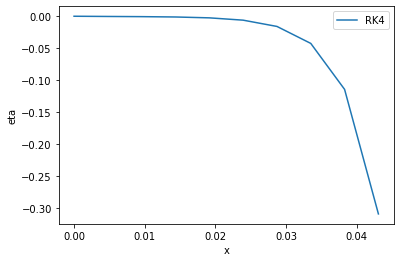

In [ ]:

def RK4(f,t,mu0):
    u = np.array([mu0]*t.size,dtype=float)
    for i in range(1,t.size):
        dt = t[i] - t[i-1]
        p1 = f(t[i-1],u[i-1])
        p2 = f(t[i-1] + dt/2, u[i-1] + dt/2*p1)
        p3 = f(t[i-1] + dt/2, u[i-1] + dt/2*p2)
        p4 = f(t[i-1] + dt  , u[i-1] + dt  *p3)
        u[i] = u[i-1] + dt/6*(p1 + 2*p2 + 2*p3 + p4)
    return u
    


x = np.arange(0,d,lc)
u0 = np.array([0.0004,-0.1])

solRK4 = RK4(f,x,u0)


plt.plot(x,solRK4[:,0], label="RK4")
plt.xlabel("x")
plt.ylabel("eta")
plt.legend()
plt.show()



----

____